# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / tips['total_bill'] * 100
tips['net_bill'] = tips['total_bill'] - tips['tip']

modelo_inicial = smf.ols('tip_pct ~ net_bill', data=tips).fit()
modelo_inicial.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     56.25
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.21e-12
Time:                        21:05:30   Log-Likelihood:                -761.73
No. Observations:                 244   AIC:                             1527.
Df Residuals:                     242   BIC:                             1534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.6233      0.819     26.401      0.000      20.010      23.237
net_bill      -0.3302      0.044     -7.500      0.000      -0.417      -0.243
==============================================================================
Omnibus:                      227.090   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8183.493
Skew:                           3.464   Prob(JB):                         0.00
Kurtosis:                      30.512   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [14]:
tips['log_net_bill'] = np.log(tips['net_bill'])

#Criando um modelo aplicando o log na variável indepenente
modelo_log_net_bill = smf.ols('tip_pct ~ log_net_bill', data=tips).fit()

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,log_net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,15.98,2.771338
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,8.68,2.161022
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,17.51,2.862772
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,20.37,3.014063
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,20.98,3.043570


In [15]:
modelo_log_net_bill.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     98.21
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.19e-19
Time:                        21:09:17   Log-Likelihood:                -745.67
No. Observations:                 244   AIC:                             1495.
Df Residuals:                     242   BIC:                             1502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       34.6800      1.906     18.198      0.000      30.926      38.434
log_net_bill    -6.8596      0.692     -9.910      0.000      -8.223      -5.496
==============================================================================
Omnibus:                      169.023   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2946.559
Skew:                           2.432   Prob(JB):                         0.00
Kurtosis:                      19.314   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [18]:
tips['net_bill_sq'] = tips['net_bill'] ** 2

modelo_polinomial = smf.ols('tip_pct ~ net_bill + net_bill_sq', data=tips).fit()

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,log_net_bill,net_bill_sq
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,15.98,2.771338,255.3604
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,8.68,2.161022,75.3424
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,17.51,2.862772,306.6001
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,20.37,3.014063,414.9369
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,20.98,3.043570,440.1604


In [19]:
modelo_polinomial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     37.97
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           4.62e-15
Time:                        21:12:08   Log-Likelihood:                -753.81
No. Observations:                 244   AIC:                             1514.
Df Residuals:                     241   BIC:                             1524.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.5186      1.667     16.504      0.000      24.234      30.803
net_bill       -1.0087      0.174     -5.796      0.000      -1.352      -0.666
net_bill_sq     0.0159      0.004      4.021      0.000       0.008       0.024
==============================================================================
Omnibus:                      194.250   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4790.145
Skew:                           2.842   Prob(JB):                         0.00
Kurtosis:                      23.949   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [22]:
tips['log_tip_pct'] = np.log(tips['tip_pct'])
modelo_log_tip_pct = smf.ols('log_tip_pct ~ net_bill', data=tips).fit()

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,log_net_bill,net_bill_sq,log_tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,15.98,2.771338,255.3604,1.782496
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,8.68,2.161022,75.3424,2.775968
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,17.51,2.862772,306.6001,2.812935
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,20.37,3.014063,414.9369,2.637488
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,20.98,3.043570,440.1604,2.686538


In [21]:
R2_log_tip_pct_net_bill = modelo_log_tip_pct.rsquared
display(modelo_log_tip_pct.summary())
print('-='*30)
print(f"R² (log_tip_pct ~ net_bill): {R2_log_tip_pct_net_bill}")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_tip_pct   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     77.95
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           2.18e-16
Time:                        21:13:38   Log-Likelihood:                -55.678
No. Observations:                 244   AIC:                             115.4
Df Residuals:                     242   BIC:                             122.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0787      0.045     67.886      0.000       2.989       3.168
net_bill      -0.0215      0.002     -8.829      0.000      -0.026      -0.017
==============================================================================
Omnibus:                       11.472   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               23.632
Skew:                          -0.141   Prob(JB):                     7.39e-06
Kurtosis:                       4.498   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
R² (log_tip_pct ~ net_bill): 0.2436292435963784


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [24]:
modelo_log_both = smf.ols('log_tip_pct ~ log_net_bill', data=tips).fit()

display(modelo_log_both.summary())
print(f"R² (log_tip_pct ~ log_net_bill): {modelo_log_both.rsquared}")


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_tip_pct   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     94.10
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           5.26e-19
Time:                        21:16:57   Log-Likelihood:                -49.670
No. Observations:                 244   AIC:                             103.3
Df Residuals:                     242   BIC:                             110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7679      0.110     34.266      0.000       3.551       3.985
log_net_bill    -0.3874      0.040     -9.700      0.000      -0.466      -0.309
==============================================================================
Omnibus:                       10.347   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.432
Skew:                          -0.397   Prob(JB):                      0.00329
Kurtosis:                       3.702   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R² (log_tip_pct ~ log_net_bill): 0.27997418686501485


###  6. qual modelo resultou no melhor ajuste?

In [25]:
# R² do modelo inicial
R2_inicial = modelo_inicial.rsquared

# R² do modelo log_net_bill
R2_log_net_bill = modelo_log_net_bill.rsquared

# R² do modelo polinomial
R2_polinomial = modelo_polinomial.rsquared

# R² do modelo log_tip_pct ~ net_bill
R2_log_tip_pct_net_bill = modelo_log_tip_pct.rsquared

# R² do modelo log_tip_pct ~ log_net_bill
R2_log_tip_pct_log_net_bill = modelo_log_both.rsquared

# Exibir os R² de cada modelo
print(f"R² (tip_pct ~ net_bill): {R2_inicial}")
print(f"R² (tip_pct ~ log_net_bill): {R2_log_net_bill}")
print(f"R² (tip_pct ~ net_bill + net_bill^2): {R2_polinomial}")
print(f"R² (log_tip_pct ~ net_bill): {R2_log_tip_pct_net_bill}")
print(f"R² (log_tip_pct ~ log_net_bill): {R2_log_tip_pct_log_net_bill}")

# Determinar qual modelo tem o melhor ajuste
melhor_modelo = max(R2_inicial, R2_log_net_bill, R2_polinomial, R2_log_tip_pct_net_bill, R2_log_tip_pct_log_net_bill)
print(f"O melhor modelo é o que tem o maior R²: {melhor_modelo}")


R² (tip_pct ~ net_bill): 0.18859378734977383
R² (tip_pct ~ log_net_bill): 0.28867891740342677
R² (tip_pct ~ net_bill + net_bill^2): 0.23961724040246823
R² (log_tip_pct ~ net_bill): 0.2436292435963784
R² (log_tip_pct ~ log_net_bill): 0.27997418686501485
O melhor modelo é o que tem o maior R²: 0.28867891740342677


***O modelo de 'log_net_bill' em relação ao 'tip_pct' contém o melhor r2. Pelo que sei, só o r2 não é suficiente para que tenhamos um modelo muito bom, mesmo com r2 alto podemos cair em overfitting, mas olhando brevemente a questão dos parâmetros e conceitos, podemos ver no parâmetro T(amarelo) do modelo de log_net_bill que ela é realmente a mais expressa, em questão de influência, parece que ela tem mais influência quando se está no seu modo logaritmo. Também, o seu intervalo de 95% é mais afastado do 0, não sei se isso é bom (verde).***

---

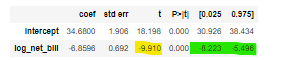